In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
my_data = pd.read_csv('../data/enzymeAssay_2019_07_19.csv') 
my_data

,Sample,Replicate_1,Replicate_2,Replicate_3,Group,buffer_group
0,Standard,0.054000,0.060,0.049000,1,na
1,3762 + CB,0.008000,0.007,0.008000,2,na
2,glutaminase + CB,0.013000,0.014,0.012000,3,CB
3,2mM glutamine + glutaminase,0.250000,0.225,0.212000,3,AA
4,2mM glutamine + CB,0.014000,0.011,0.014000,4,CB
5,2mM glutamine + 3762,0.015000,0.010,0.007000,4,AA
6,2mM aspartate + column buffer,0.014000,0.011,0.009267,5,CB
7,2mM aspartate + 3762,0.009567,0.007,0.008000,5,AA


In [78]:
len(my_data)

8

In [79]:
averages = []
std = []

#upper_bound = []
#lower_bound = []

for i in range(len(my_data)):
    values_oi = my_data.iloc[i][['Replicate_1', 'Replicate_2', 'Replicate_3']]
    averages.append(values_oi.mean())
    std.append(np.std(values_oi))
    
    #lower_bound.append(averages[i] - values_oi.min())
    #upper_bound.append(values_oi.max() - averages[i])
    
my_data['averages'] = averages
my_data['std'] = std

In [80]:
#my_data[['Sample', 'averages', 'lower_bound', 'upper_bound', 'Group', 'buffer_group']]
my_data[['Sample', 'averages', 'std', 'Group', 'buffer_group']]
print(my_data)

                          Sample  Replicate_1  Replicate_2  Replicate_3  \
0                       Standard     0.054000        0.060     0.049000   
1                      3762 + CB     0.008000        0.007     0.008000   
2               glutaminase + CB     0.013000        0.014     0.012000   
3    2mM glutamine + glutaminase     0.250000        0.225     0.212000   
4             2mM glutamine + CB     0.014000        0.011     0.014000   
5           2mM glutamine + 3762     0.015000        0.010     0.007000   
6  2mM aspartate + column buffer     0.014000        0.011     0.009267   
7           2mM aspartate + 3762     0.009567        0.007     0.008000   

   Group buffer_group  averages       std  
0      1           na  0.054333  0.004497  
1      2           na  0.007667  0.000471  
2      3           CB  0.013000  0.000816  
3      3           AA  0.229000  0.015769  
4      4           CB  0.013000  0.001414  
5      4           AA  0.010667  0.003300  
6      5        

In [81]:
# Setting the positions and width for the bars
pos = list(range(len(my_data))) 


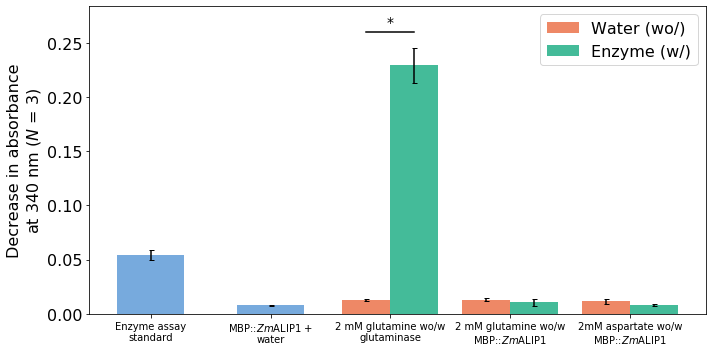

In [83]:
width = 0.8
ind = np.arange(5)
na_ind = ind[:2]
cb_ind = ind[2:] - (width/4)
aa_ind = ind[2:] + (width/4)


# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

na_data = my_data.loc[my_data['buffer_group'] == 'na']
CB_data = my_data.loc[my_data['buffer_group'] == 'CB']
AA_data = my_data.loc[my_data['buffer_group'] == 'AA']

# Create a bar with pre_score data,
# in position pos,
p1 = plt.bar(na_ind, na_data['averages'], width*0.7, color='#77AADD', alpha=1, yerr=[na_data['std'], na_data['std']], capsize=(2.5))
p2 = plt.bar(cb_ind, CB_data['averages'], width/2, color='#EE8866', alpha=1, yerr=[CB_data['std'], CB_data['std']], capsize=(2.5))
p3 = plt.bar(aa_ind, AA_data['averages'], width/2, color = '#44BB99', alpha=1, yerr=[AA_data['std'], AA_data['std']], capsize=(2.5))


ax.set_xticklabels(('', 'Enzyme assay\nstandard', 'MBP::$\it{Zm}$ALIP1 +\nwater', '2 mM glutamine wo/w\nglutaminase', '2 mM glutamine wo/w\nMBP::$\it{Zm}$ALIP1', '2mM aspartate wo/w\nMBP::$\it{Zm}$ALIP1'), fontsize=10)


plt.yticks(fontsize = 16)
ax.legend((p2[0], p3[0]), ('Water (wo/)', 'Enzyme (w/)'), fontsize=16)
plt.ylabel('Decrease in absorbance\nat 340 nm ($\it{N}$ = 3)', fontsize=16)

plt.plot([1.8, 2.2], [0.26, 0.26], 'k') 
plt.plot([1.7, 2.3], [0.27, 0.27], 'w') 
plt.text(2, 0.265, '*', fontsize=14, ha='center')


plt.tight_layout()
plt.savefig('../figures/ALIP1_enzyme_assay_glutamine_aspartate.pdf', format = 'pdf')
